In [ ]:
import pandas as pd

reviews_data=pd.read_csv('/content/chatgpt_reviews_dataset.xlsx - Sheet1.csv')

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
reviews_data['review'][0]

'Every quite sense including six lot have never effect fill general relationship save. Security land record class Democrat hundred full nearly recent.'

In [ ]:
reviews_data.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No


In [ ]:
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               250 non-null    object
 1   title              250 non-null    object
 2   review             250 non-null    object
 3   rating             250 non-null    int64 
 4   username           250 non-null    object
 5   helpful_votes      250 non-null    int64 
 6   review_length      250 non-null    int64 
 7   platform           250 non-null    object
 8   language           250 non-null    object
 9   location           250 non-null    object
 10  version            250 non-null    object
 11  verified_purchase  250 non-null    object
dtypes: int64(3), object(9)
memory usage: 23.6+ KB


In [ ]:
reviews_data['rating'].value_counts()

,count
rating,
1,59
3,57
5,55
4,41
2,38


In [ ]:
# remove stoping words in data
!pip install nltk

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stops_words=stopwords.words('english')
def remove_stop_words(text):
  words=text.split()
  filtered_words=[word for word in words if word.lower() not in stops_words]
  return " ".join(filtered_words)
reviews_data['clean_review']=reviews_data['review'].apply(remove_stop_words)

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
reviews_data[['review','clean_review']]


,review,clean_review
0,Every quite sense including six lot have never...,Every quite sense including six lot never effe...
1,Ask develop bag also his worker pass. Expert w...,Ask develop bag also worker pass. Expert white...
2,If customer address region try near risk next ...,customer address region try near risk next gir...
3,To television loss election him small detail r...,television loss election small detail red son ...
4,Pass share must amount lot per manage world to...,Pass share must amount lot per manage world ma...
...,...,...
245,Government card history suddenly save theory s...,Government card history suddenly save theory s...
246,Court control million hundred offer total hit ...,Court control million hundred offer total hit ...
247,Just opportunity ask yet against large practic...,opportunity ask yet large practice time live r...
248,Onto simple audience as including claim create...,Onto simple audience including claim create wo...


In [ ]:
#root meaning word -lemmatization
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemmatizer=WordNetLemmatizer()

def lemmatize_text(text):
  words=text.split()
  lemmatized_words=[lemmatizer.lemmatize(word) for word in words]
  return " ".join(lemmatized_words)
reviews_data["processed_reviews"]=reviews_data["clean_review"].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
reviews_data[['review','clean_review','processed_reviews']]

,review,clean_review,processed_reviews
0,Every quite sense including six lot have never...,Every quite sense including six lot never effe...,Every quite sense including six lot never effe...
1,Ask develop bag also his worker pass. Expert w...,Ask develop bag also worker pass. Expert white...,Ask develop bag also worker pass. Expert white...
2,If customer address region try near risk next ...,customer address region try near risk next gir...,customer address region try near risk next gir...
3,To television loss election him small detail r...,television loss election small detail red son ...,television loss election small detail red son ...
4,Pass share must amount lot per manage world to...,Pass share must amount lot per manage world ma...,Pass share must amount lot per manage world ma...
...,...,...,...
245,Government card history suddenly save theory s...,Government card history suddenly save theory s...,Government card history suddenly save theory s...
246,Court control million hundred offer total hit ...,Court control million hundred offer total hit ...,Court control million hundred offer total hit ...
247,Just opportunity ask yet against large practic...,opportunity ask yet large practice time live r...,opportunity ask yet large practice time live r...
248,Onto simple audience as including claim create...,Onto simple audience including claim create wo...,Onto simple audience including claim create wo...


In [ ]:
reviews_data.info()# i take it processed_reviews as a final preprocessed feature so i drop other reviews feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               250 non-null    object
 1   title              250 non-null    object
 2   review             250 non-null    object
 3   rating             250 non-null    int64 
 4   username           250 non-null    object
 5   helpful_votes      250 non-null    int64 
 6   review_length      250 non-null    int64 
 7   platform           250 non-null    object
 8   language           250 non-null    object
 9   location           250 non-null    object
 10  version            250 non-null    object
 11  verified_purchase  250 non-null    object
 12  clean_review       250 non-null    object
 13  processed_reviews  250 non-null    object
dtypes: int64(3), object(11)
memory usage: 27.5+ KB


In [ ]:
reviews_data.drop(['review','clean_review'],axis=1,inplace=True)

In [ ]:
reviews_data.isnull().sum()

,0
date,0
title,0
rating,0
username,0
helpful_votes,0
review_length,0
platform,0
language,0
location,0
version,0


In [ ]:
def sentiment_analysis(text):
  if text>3:
    return 'Positive'
  elif text<3:
    return 'Negative'
  else:
    return 'Neutral'
reviews_data['sentiment']=reviews_data['rating'].apply(sentiment_analysis)

In [ ]:
reviews_data.head(20)

,date,title,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,processed_reviews,sentiment
0,2024-09-06,Claim who accept.,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No,Every quite sense including six lot never effe...,Positive
1,3/7/2025,Growth pretty wish.,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes,Ask develop bag also worker pass. Expert white...,Positive
2,########,What then spend offer reason whom none.,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No,customer address region try near risk next gir...,Positive
3,########,Say dog drug enter director strong student.,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No,television loss election small detail red son ...,Negative
4,########,Purpose here beyond.,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No,Pass share must amount lot per manage world ma...,Positive
5,########,Care throw piece move firm main economy.,3,rosshannah,48,23,Flipkart,pt,Bahamas,4.3.6,Yes,Especially gas contain interest industry sell ...,Neutral
6,2/5/2025,Maintain say threat high expert place certain.,3,daniellemcfarland,190,18,App Store,ja,Italy,4.2.7,Yes,Live picture last free guess night use electio...,Neutral
7,########,Share bar energy choice pressure those finally.,2,joanramos,128,29,Website,zh,Brunei Darussalam,1.7.1,No,Occur support author class direction first fac...,Negative
8,########,Source kind hand employee field.,1,millskatherine,184,21,Flipkart,ja,Burkina Faso,2.1.7,No,Stuff agreement professional team foot live wi...,Negative
9,########,Determine bad personal might son party.,3,justin84,159,16,App Store,es,Isle of Man,3.8.6,No,Light across two water local across involve fa...,Neutral


In [ ]:
reviews_data['sentiment'].value_counts()

,count
sentiment,
Negative,97
Positive,96
Neutral,57


# **Now build the model**

In [ ]:
target={'Positive':2,'Neutral':1,'Negative':0}
reviews_data['target']=reviews_data['sentiment'].map(target)

In [ ]:
reviews_data.head(10)

,date,title,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,processed_reviews,sentiment,target
0,2024-09-06,Claim who accept.,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No,Every quite sense including six lot never effe...,Positive,2
1,3/7/2025,Growth pretty wish.,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes,Ask develop bag also worker pass. Expert white...,Positive,2
2,########,What then spend offer reason whom none.,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No,customer address region try near risk next gir...,Positive,2
3,########,Say dog drug enter director strong student.,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No,television loss election small detail red son ...,Negative,0
4,########,Purpose here beyond.,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No,Pass share must amount lot per manage world ma...,Positive,2
5,########,Care throw piece move firm main economy.,3,rosshannah,48,23,Flipkart,pt,Bahamas,4.3.6,Yes,Especially gas contain interest industry sell ...,Neutral,1
6,2/5/2025,Maintain say threat high expert place certain.,3,daniellemcfarland,190,18,App Store,ja,Italy,4.2.7,Yes,Live picture last free guess night use electio...,Neutral,1
7,########,Share bar energy choice pressure those finally.,2,joanramos,128,29,Website,zh,Brunei Darussalam,1.7.1,No,Occur support author class direction first fac...,Negative,0
8,########,Source kind hand employee field.,1,millskatherine,184,21,Flipkart,ja,Burkina Faso,2.1.7,No,Stuff agreement professional team foot live wi...,Negative,0
9,########,Determine bad personal might son party.,3,justin84,159,16,App Store,es,Isle of Man,3.8.6,No,Light across two water local across involve fa...,Neutral,1


In [ ]:
from sklearn.model_selection import train_test_split

x = reviews_data["processed_reviews"]
y = reviews_data["target"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=10000,
    sublinear_tf=True
)

X_train_tfidf = tfidf.fit_transform(x_train)
X_test_tfidf = tfidf.transform(x_test)


In [ ]:
y_train.value_counts()

,count
target,
0,78
2,77
1,45


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_tfidf, y_train = smote.fit_resample(X_train_tfidf, y_train)

In [ ]:
y_train.value_counts()

,count
target,
0,78
1,78
2,78


In [ ]:
y_test.value_counts()

,count
target,
0,19
2,19
1,12


In [ ]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train_tfidf,y_train)

LogisticRegression()

In [ ]:
import numpy as np
y_hat=np.argmax(lr.predict_proba(X_test_tfidf),axis=1)


In [ ]:
y_hat=pd.Series(y_hat)
y_hat.value_counts()

,count
2,25
0,24
1,1


In [ ]:
y_test.value_counts()

,count
target,
0,19
2,19
1,12


In [ ]:
from sklearn.metrics import *

print(confusion_matrix(y_test,y_hat))

print(classification_report(y_test,y_hat))

[[ 9  0 10]
 [ 8  0  4]
 [ 7  1 11]]
              precision    recall  f1-score   support

           0       0.38      0.47      0.42        19
           1       0.00      0.00      0.00        12
           2       0.44      0.58      0.50        19

    accuracy                           0.40        50
   macro avg       0.27      0.35      0.31        50
weighted avg       0.31      0.40      0.35        50



In [ ]:
prescision=precision_score(y_test,y_hat,average='weighted')
recall=recall_score(y_test,y_hat,average='weighted')
f1=f1_score(y_test,y_hat,average='weighted')
accuracy=accuracy_score(y_test,y_hat)

print("prescision:",prescision)
print("recall:",recall)
print("f1:",f1)
print("accuracy:",accuracy)

prescision: 0.3097
recall: 0.4
f1: 0.34906976744186047
accuracy: 0.4


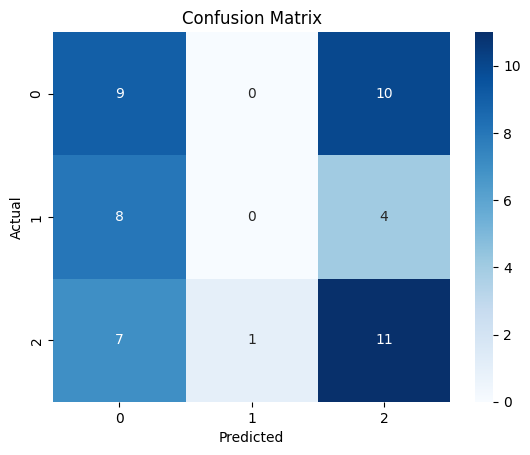

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion = confusion_matrix(y_test, y_hat)

sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

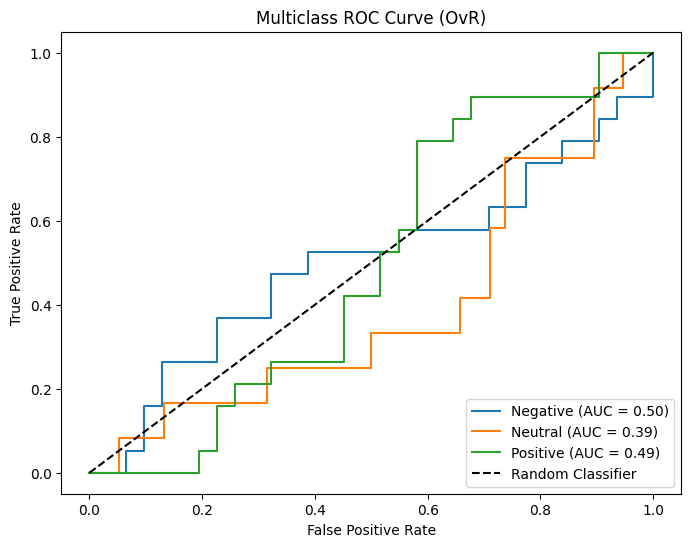

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

labels = ['Negative', 'Neutral', 'Positive']

classes = sorted(y_test.unique())
y_test_bin = label_binarize(y_test, classes=classes)

y_pred_proba = lr.predict_proba(X_test_tfidf)

plt.figure(figsize=(8, 6))
for i, label in enumerate(labels):
    #Calculate ROC AUC score for each class
    roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])

    # Calculate ROC curve for each class
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (OvR)')
plt.legend(loc='lower right')
plt.show()



Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.9,
    max_features=5000
)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB(
    alpha=0.4
)


In [ ]:
from sklearn.pipeline import Pipeline

pipeline_nb = Pipeline([
    ('tfidf', tfidf),
    ('nb', nb)
])


In [ ]:
from sklearn.model_selection import train_test_split

x = reviews_data["processed_reviews"]
y = reviews_data["target"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [ ]:
pipeline_nb.fit(x_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, max_features=5000, min_df=2,
                                 ngram_range=(1, 2))),
                ('nb', MultinomialNB(alpha=0.4))])

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'nb__alpha': [0.1, 0.3, 0.5, 1.0,0.4,0.6,0.7,0.8,0.9]
}

grid_nb = GridSearchCV(
    pipeline_nb,
    param_grid,
    scoring='f1_macro',
    cv=5
)

grid_nb.fit(x_train, y_train)

print("Best F1:", grid_nb.best_score_)
print("Best alpha:", grid_nb.best_params_)


Best F1: 0.32220815311442325
Best alpha: {'nb__alpha': 0.4}


In [ ]:
from sklearn.metrics import classification_report

y_pred = pipeline_nb.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.38      0.47      0.42        19
           1       0.33      0.08      0.13        12
           2       0.39      0.47      0.43        19

    accuracy                           0.38        50
   macro avg       0.37      0.34      0.33        50
weighted avg       0.37      0.38      0.35        50



In [ ]:
prescision=precision_score(y_test,y_hat,average='weighted')
recall=recall_score(y_test,y_hat,average='weighted')
f1=f1_score(y_test,y_hat,average='weighted')
accuracy=accuracy_score(y_test,y_hat)
confusion=confusion_matrix(y_test,y_hat)

print("prescision:",prescision)
print("recall:",recall)
print("f1:",f1)
print("accuracy:",accuracy)
print("confusion:",confusion)

prescision: 0.3097
recall: 0.4
f1: 0.34906976744186047
accuracy: 0.4
confusion: [[ 9  0 10]
 [ 8  0  4]
 [ 7  1 11]]


In [ ]:
y_prob = pipeline_nb.predict_proba(x_test)

In [ ]:
y_prob.shape

(50, 3)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(
    y_test,
    y_prob,
    multi_class='ovr',
    average='macro'
)

print("ROC-AUC (OvR, macro):", roc_score)


ROC-AUC (OvR, macro): 0.47559422750424446


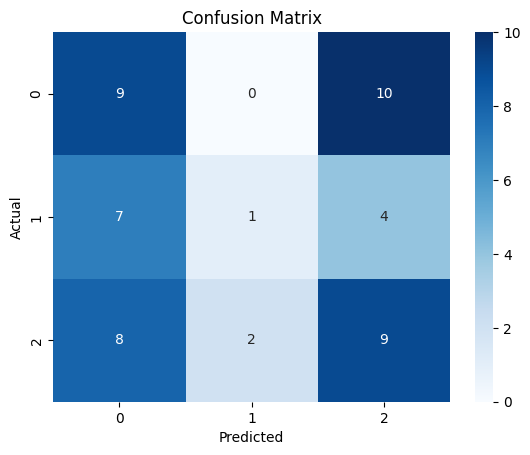

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


ROC-AUC: 0.47559422750424446


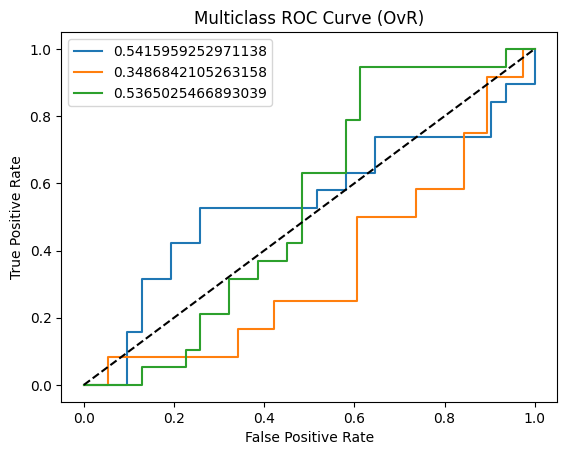

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve

roc_score =roc_auc_score(y_test,y_prob,multi_class='ovr',average='macro')
print("ROC-AUC:",roc_score)

classes = [0, 1, 2]  # Negative, Neutral, Positive
y_test_bin = label_binarize(y_test, classes=classes)

for i, label in enumerate(['Negative', 'Neutral', 'Positive']):
    roc=roc_auc_score(y_test_bin[:, i], y_prob[:, i])
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=roc)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (OvR)')
plt.legend()
plt.show()


**LSTM**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(reviews_data['processed_reviews'])

sequences = tokenizer.texts_to_sequences(reviews_data['processed_reviews'])


In [ ]:
sequences

[[36,
  403,
  267,
  152,
  268,
  37,
  92,
  865,
  785,
  786,
  13,
  404,
  269,
  569,
  14,
  405,
  406,
  93,
  407,
  408,
  153],
 [409,
  15,
  270,
  570,
  410,
  787,
  681,
  271,
  154,
  272,
  155,
  38,
  273,
  682,
  94,
  39,
  274,
  268,
  788,
  275,
  571],
 [276,
  277,
  278,
  683,
  789,
  40,
  279,
  156,
  280,
  41,
  281,
  411,
  95,
  412,
  572,
  413,
  414,
  157,
  158],
 [159,
  16,
  282,
  790,
  791,
  5,
  160,
  96,
  283,
  415,
  573,
  42,
  161,
  416,
  574,
  792,
  284,
  17,
  417,
  418,
  162,
  158,
  285,
  163],
 [787,
  286,
  287,
  684,
  37,
  419,
  420,
  421,
  164,
  410,
  165,
  15,
  97,
  166,
  160,
  422,
  287,
  167,
  168,
  423,
  424,
  18,
  288,
  169],
 [162,
  289,
  685,
  19,
  575,
  98,
  425,
  93,
  99,
  290,
  97,
  426,
  576,
  170,
  171,
  427,
  20,
  43],
 [17,
  6,
  577,
  100,
  44,
  428,
  284,
  282,
  793,
  578,
  172,
  41,
  101,
  21,
  45,
  22,
  429,
  46],
 [102,
  794,
  4

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = pad_sequences(sequences, maxlen=200, padding='post', truncating='post')
y = reviews_data['target']


In [ ]:
X

array([[ 36, 403, 267, ...,   0,   0,   0],
       [409,  15, 270, ...,   0,   0,   0],
       [276, 277, 278, ...,   0,   0,   0],
       ...,
       [106, 409, 544, ...,   0,   0,   0],
       [522, 644, 449, ...,   0,   0,   0],
       [ 71, 243, 385, ...,   0,   0,   0]], dtype=int32)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
print(y_train.value_counts())

target
0    68
2    66
1    41
Name: count, dtype: int64


In [ ]:
y_test.value_counts()

,count
target,
2,30
0,29
1,16


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = dict(enumerate(class_weights))
print(class_weights)


{0: np.float64(0.8658008658008658), 1: np.float64(1.4814814814814814), 2: np.float64(0.8547008547008547)}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, LSTM, Dense, Dropout, Bidirectional
)
from tensorflow.keras.regularizers import l2

model = Sequential([
    Embedding(
        input_dim=20000,
        output_dim=128,
        input_shape=(200,)
    ),

    Bidirectional(
        LSTM(128, return_sequences=True, kernel_regularizer=l2(0.001))
    ),
    Dropout(0.4),

    Bidirectional(
        LSTM(64, kernel_regularizer=l2(0.001))
    ),
    Dropout(0.4),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 200, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 200, 256)       │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 200, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,995,971 (11.43 MB)

 Trainable params: 2,995,971 (11.43 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_test, y_test),
    class_weight=class_weights,
    callbacks=[early_stop]
)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.3108 - loss: 2.0024 - val_accuracy: 0.3600 - val_loss: 1.9276
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3779 - loss: 1.9088 - val_accuracy: 0.3600 - val_loss: 1.8414
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 893ms/step - accuracy: 0.3496 - loss: 1.8248 - val_accuracy: 0.4000 - val_loss: 1.7695
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 885ms/step - accuracy: 0.3451 - loss: 1.7608 - val_accuracy: 0.2400 - val_loss: 1.7059
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 855ms/step - accuracy: 0.3109 - loss: 1.6795 - val_accuracy: 0.2400 - val_loss: 1.6617
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 848ms/step - accuracy: 0.2516 - loss: 1.6215 - val_accuracy: 0.2400 - val_loss: 1.6021
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.2950 - loss: 1.5405 - val_accuracy: 0.4800 - val_loss: 1.5208
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 920ms/step - accuracy: 0.6996 - loss: 1.4298 - val_accuracy: 0.3400 - val_loss: 1.4892


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

y_pred = np.argmax(model.predict(X_test), axis=1)

print(classification_report(y_test, y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
              precision    recall  f1-score   support

           0       0.41      0.37      0.39        19
           1       0.29      0.17      0.21        12
           2       0.42      0.58      0.49        19

    accuracy                           0.40        50
   macro avg       0.37      0.37      0.36        50
weighted avg       0.39      0.40      0.38        50



In [ ]:
prescision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')
accuracy=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)

print("prescision:",prescision)
print("recall:",recall)
print("f1:",f1)
print("accuracy:",accuracy)
print("confusion:",confusion)

prescision: 0.3858112475759535
recall: 0.4
f1: 0.38408187134502925
accuracy: 0.4
confusion: [[ 7  3  9]
 [ 4  2  6]
 [ 6  2 11]]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


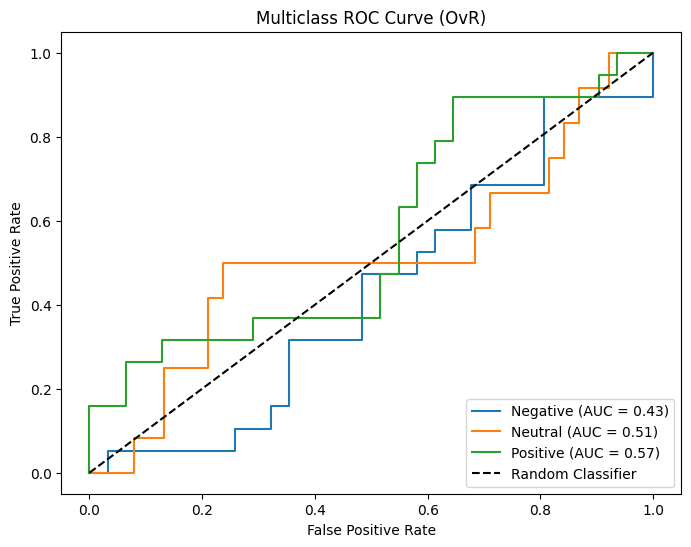

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test)

classes = [0, 1, 2]
y_test_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(8, 6))
for i, label_name in enumerate(['Negative', 'Neutral', 'Positive']):
    roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'{label_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (OvR)')
plt.legend(loc='lower right')
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Classification Report for Loaded Model:
              precision    recall  f1-score   support

           0       0.41      0.37      0.39        19
           1       0.29      0.17      0.21        12
           2       0.42      0.58      0.49        19

    accuracy                           0.40        50
   macro avg       0.37      0.37      0.36        50
weighted avg       0.39      0.40      0.38        50



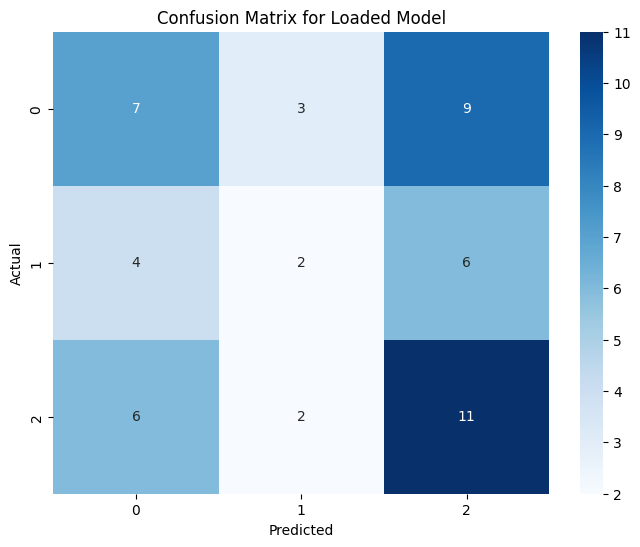

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions from the loaded model
y_pred_loaded = np.argmax(loaded_model.predict(X_test), axis=1)

print("Classification Report for Loaded Model:")
print(classification_report(y_test, y_pred_loaded))

# Create and display the confusion matrix
confusion_loaded = confusion_matrix(y_test, y_pred_loaded)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_loaded, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Loaded Model')
plt.show()

#**Conclusion**
1. Its just a try of sentiment classification every models perform underfitting because of the required amount of data is not satified in this dataset
2. And this dataset are highly imbalanced in category, it had only 250 instance .
3. If you want to train a custome models VEDAR, TEXTBLOB, Transformer Architecture(BERT,RoBERTa,like this) clear with data,based on a data choose your model wisely
4. In this case if you want realtime sentiment analysis go with pretrained models like VEDAR, TEXTBLOB, Transformer Architecture(BERT,RoBERTa,like this).